In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_notarget = pickle.load(open('results/1608356347.337566_notarget.pickle', 'rb'))
data_target = pickle.load(open('results/1608345412.4393542_exp_target.pickle', 'rb'))
data_new = pickle.load(open('results/1610731664.7299528_one_agent.pickle', 'rb'))

print(data_notarget['config'])

{'envName': 'CartPole-v1', 'useTargetQ': False, 'QTargetLag': 100, 'adpBins': 9, 'mutual': {'ADPQ': True, 'heterogeneous': True, 'mutualSteps': 1000}, 'standard': {'Q': True, 'ADP': True}, 'trials': 50, 'stepsPerTrial': 10000, 'stepsPerEvaluation': 100, 'gamma': 0.99, 'holdOutStates': 1000}


In [3]:
data_notarget['names']

['adp_sharing_tuples',
 'q_mutual',
 'q_standard',
 'adp_standard',
 'single_agent_mutual']

In [14]:
xticks = np.arange(50) * 100
mut_q_mean = np.mean(data_notarget['results'], axis=0)[:, 1][:50]
mut_adp_mean = np.mean(data_notarget['results'], axis=0)[:, 0][:50]
std_q_mean = np.mean(data_notarget['results'], axis=0)[:, 2][:50]
std_adp_mean = np.mean(data_notarget['results'], axis=0)[:, 3][:50]
hetmut_mean = np.mean(data_new['results'], axis=0)[:, 2][:50]

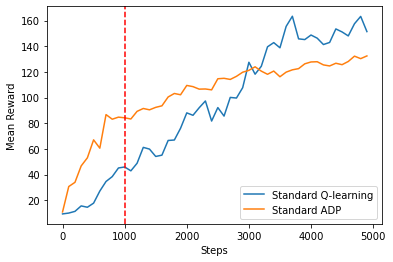

In [15]:
plt.plot(xticks, std_q_mean, label='Standard Q-learning')
plt.plot(xticks, std_adp_mean, label='Standard ADP')
plt.axvline(1000, color='r', ls='--')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/standards.png')

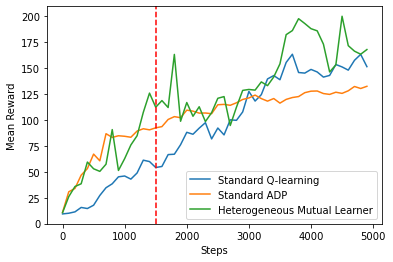

In [19]:
plt.plot(xticks, std_q_mean, label='Standard Q-learning')
plt.plot(xticks, std_adp_mean, label='Standard ADP')
plt.plot(xticks, hetmut_mean, label='Heterogeneous Mutual Learner')

plt.axvline(1500, ls='--', c='r')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/het_comparison.png')

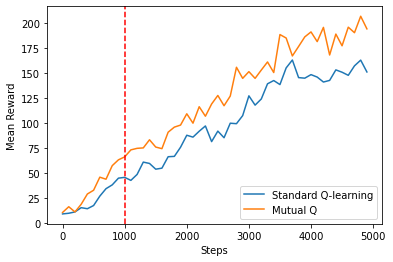

In [7]:
#q_std = np.std(data_std, axis=0).T[2]
#q_mean = np.mean(data_std, axis=0).T[2]
plt.plot(xticks, std_q_mean, label='Standard Q-learning')
plt.plot(xticks, mut_q_mean, label='Mutual Q')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()
plt.axvline(1000, ls='--', c='r')
plt.savefig('./figs/q_mutual_comparison.png')

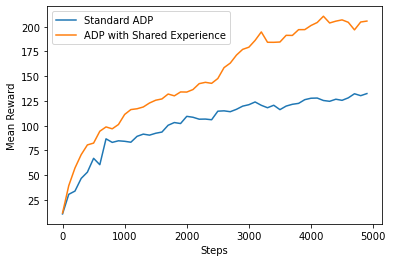

In [8]:
plt.plot(xticks, std_adp_mean, label='Standard ADP')
plt.plot(xticks, mut_adp_mean, label='ADP with Shared Experience')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/adp_mutual_comparison.png')

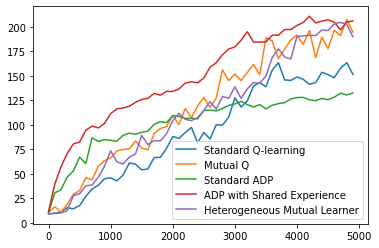

In [10]:
plt.plot(xticks, std_q_mean, label='Standard Q-learning')
plt.plot(xticks, mut_q_mean, label='Mutual Q')
plt.plot(xticks, std_adp_mean, label='Standard ADP')
plt.plot(xticks, mut_adp_mean, label='ADP with Shared Experience')
plt.plot(xticks, hetmut_mean, label='Heterogeneous Mutual Learner')

plt.legend()
plt.show()

In [11]:
means = [
    std_q_mean,
    mut_q_mean,
    std_adp_mean,
    mut_adp_mean,
    hetmut_mean
]

labels=[
    'Q (Standard)',
    'Q (Mutual)',
    'ADP (Standard)',
    'ADP (Mutual)',
    'Heterogeneous Mutual'
]

for m, l in zip(means, labels):
    print(f'{l}: {np.max(m)}')

Q (Standard): 163.41399999999993
Q (Mutual): 207.216
ADP (Standard): 132.491
ADP (Mutual): 210.61899999999991
Heterogeneous Mutual: 204.3599999999999


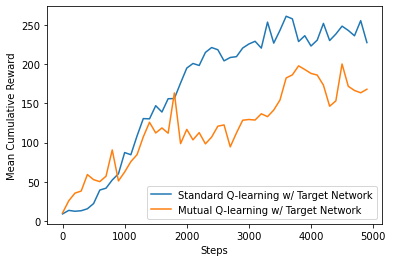

In [20]:
target_q_mean = np.mean(data_target['results'], axis=0)[:, 2][:50]
target_mut_q_mean = np.mean(data_target['results'], axis=0)[:, 1][:50]

plt.title('')
plt.plot(xticks, target_q_mean, label='Standard Q-learning w/ Target Network')
plt.plot(xticks, hetmut_mean, label='Mutual Q-learning w/ Target Network')
plt.ylabel('Mean Cumulative Reward')
plt.xlabel('Steps')
plt.legend()
plt.savefig('mutual_vs_target.png')

In [13]:
data_constant = pickle.load(open('results/1608888363.9154332_better_proportional_weight.pickle', 'rb'))
data_constant['config']

{'envName': 'CartPole-v1',
 'useTargetQ': True,
 'QTargetLag': 100,
 'adpBins': 9,
 'exploration': {'initialEpsilon': 1.0,
  'finalEpsilon': 0.01,
  'decaySteps': 5000},
 'mutual': {'ADPQ': True,
  'heterogeneous': True,
  'mutualSteps': 1000,
  'weight': 5.0,
  'type': 'proportional'},
 'standard': {'Q': True, 'ADP': True},
 'trials': 50,
 'stepsPerTrial': 5000,
 'stepsPerEvaluation': 100,
 'gamma': 0.99,
 'holdOutStates': 1000}

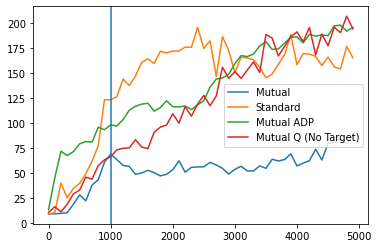

In [15]:
plt.plot(xticks, np.mean(data_constant['results'], axis=0)[:, 1], label='Mutual')
plt.plot(xticks, np.mean(data_constant['results'], axis=0)[:, 2], label='Standard')
plt.plot(xticks, np.mean(data_constant['results'], axis=0)[:, 0], label='Mutual ADP')
plt.plot(xticks, mut_q_mean, label='Mutual Q (No Target)')


plt.axvline(1000)
plt.legend()
plt.show()